<a href="https://colab.research.google.com/github/maximzhu/FastAI-Russian/blob/master/Image_Classification_(Rus).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Классификация изображений

*by: Maxim Zhurbey. Inspired by [FastAI](https://www.fast.ai)*

**Внимание. Этот урок объяснен в подробностях по этой [ссылке](https://youtu.be/8j9aN8aKd9Y). **

В этом уроке мы создадим нейронную сеть, которая будет классифицировать изображения из нашего собзтвенного датасета. Для начала в меню нажмите Runtime - Change runtime type и выберите GPU. Это позволит изпользовать видеокарту Google в облаке (12GB бесплатно).

Установим необходимые апдейты.

In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
spacy 2.0.18 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
Done.


Теперь импортируем библиотеки.

In [0]:
from fastai.vision import *

## Скачиваем список ссылок на изображения

### Ищем и пролистываем


Вам нужно будет проделать этот шаг для каждой из ваших категорий.


Откройте [Google Images](http://images.google.com) и ищите одну из ваших категорий. Чем направленней и уже ваш поиск, тем качественней ваш датасет. Пролистывайте вниз до самого конца. Если есть кнопка "Показать еще", нажимайте ее и пролистывайте до конца. В итоге вами будет достигнут максимум в 700 изображений.


### Скачиваем список

В окне с изображениями нажимем <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>J</kbd> на Windows/Linux и <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>J</kbd> на Mac. Откроется консоль. Копируем и вставляем туда следующий код:


```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

Жмем Enter. Начнет скачиваться файл со ссылками на изображения. Найдите его у себя на компьютере и переименуйте в вашу категорию. Файл может иметь расширение .csv или .txt, что не имеет особого значения.


### Создаем директорию и закачиваем список

---



Сперва подключаем ваш Google Drive. Вам нужно будет пройти по ссылке и авторизоваться, скопировать ссылку, вставить в поле и нажать Enter. Этот пункт можно пропустить, но тогда все ваши файлы в этом проекте удалятся после закрытия этого окна в браузере.

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


Открываем в браузере Google Drive и вручную создаем директорию, куда загружаем наши списки. Теперь программно создаем директории для изображений.

In [0]:
folder = 'black'
file = 'black.csv' # название вашего файла
path = Path(root_dir + '____/') # сюда нужно будет вручную написать созданную вами директорию
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

Скачиваем изображения.

In [0]:
download_images(path/file, dest, max_pics=200)

Повторяем то же самое для остальных категорий.

In [0]:
folder = 'grizzly'
file = 'grizzly.csv' # название вашего файла
path = Path(root_dir + 'AI Image Bear/') # сюда нужно будет вручную написать созданную вами директорию
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
download_images(path/file, dest, max_pics=200)

Error https://www.gotscience.org/wp-content/uploads/2015/08/19532120519_0fcf695d7b_k-e1441158706270.jpg ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))
Error https://www.washingtonpost.com/resizer/S2qpHxfmuc7JUINSZp4pd8_N7m4=/480x0/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/AUEKO7HTGII6RGOCZ7FG7T3BBQ.jpg HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=4)
Error https://www.washingtonpost.com/resizer/S2qpHxfmuc7JUINSZp4pd8_N7m4=/480x0/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/AUEKO7HTGII6RGOCZ7FG7T3BBQ.jpg HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=4)
Error https://www.washingtonpost.com/resizer/rNWQ6oDst_gqJ_khkSXYRtftUz4=/1484x0/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/Q453GZ66JEZEZFGRDAJEPKT254.png HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=4)


## Чистим изображения

Теперь мы можем удалить все изображения, которые повреждены или не могут быть открыты.

In [0]:
classes = ['grizzly','black']

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

teddys


/usr/local/lib/python3.6/dist-packages/fastprogress/fastprogress.py:95: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


grizzly


cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/AI Image Bear/grizzly/00000026.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/AI Image Bear/grizzly/00000091.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/AI Image Bear/grizzly/00000106.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/AI Image Bear/grizzly/00000128.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/AI Image Bear/grizzly/00000139.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/AI Image Bear/grizzly/00000151.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/AI Image Bear/grizzly/00000159.jpg'>
black


Image /content/gdrive/My Drive/AI Image Bear/black/00000005.gif has 1 instead of 3 channels
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/AI Image Bear/black/00000029.png'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/AI Image Bear/black/00000025.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/AI Image Bear/black/00000032.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/AI Image Bear/black/00000026.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/AI Image Bear/black/00000056.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/AI Image Bear/black/00000079.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/AI Image Bear/black/00000090.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/AI Image Bear/black/00000117.jpg'>
cann

## Создаем датасет

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
# If you already cleaned your data, run this cell instead of the one before
# np.random.seed(42)
# data = ImageDataBunch.from_csv(".", folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Тепеь посмотрим на изображения.

In [0]:
data.classes

['black', 'grizzly']

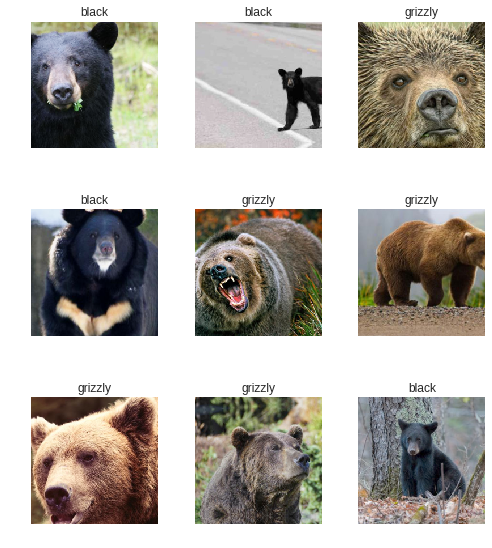

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black', 'grizzly'], 2, 300, 74)

## Тренируем модель

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 94786264.13it/s]


In [0]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate
1,0.769723,0.405854,0.189189
2,0.487720,0.148805,0.054054
3,0.359709,0.108179,0.040541
4,0.287281,0.093035,0.040541
5,0.246763,0.078634,0.027027


In [0]:
learn.save('stage-1')

In [0]:
learn.export()

## Интерпретация

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

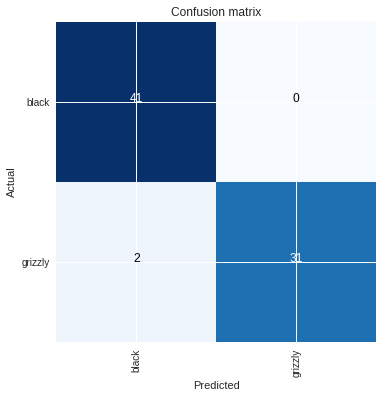

In [0]:
interp.plot_confusion_matrix()

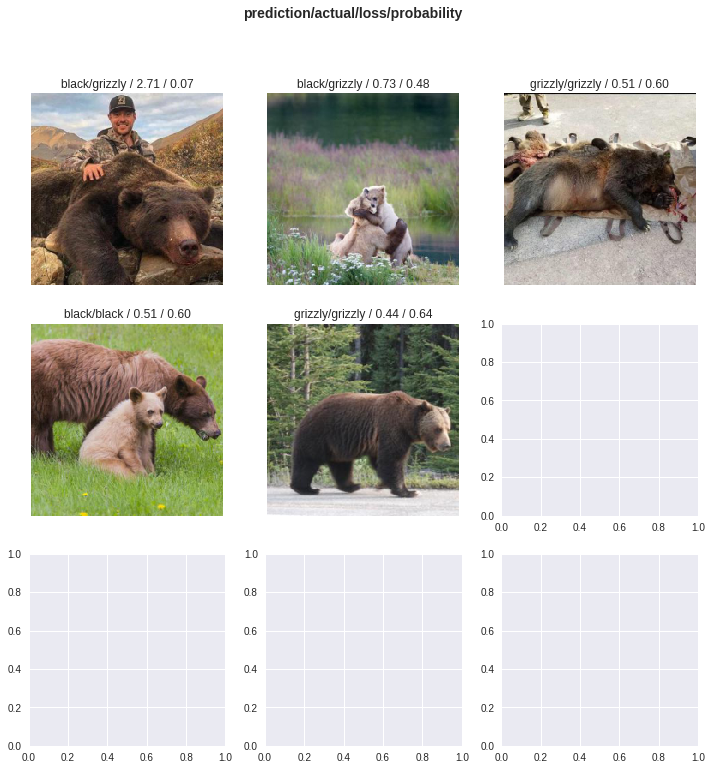

In [0]:
interp.plot_top_losses(5)

## Тест

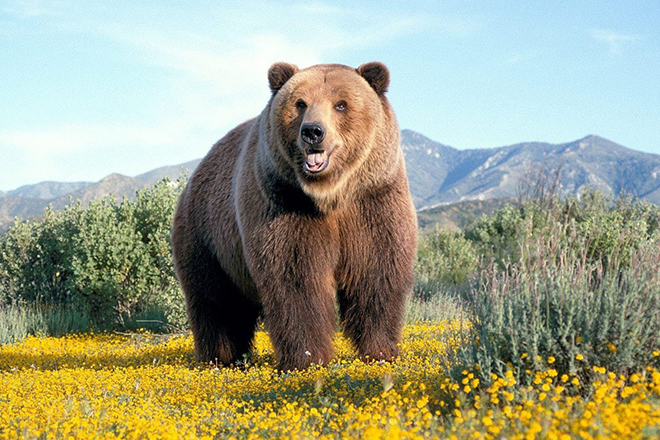

In [0]:
img = open_image(path/'black'/'00000022.jpg')
img

In [0]:
#learn = load_learner(path)

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category grizzly

In [0]:
outputs

tensor([0.0034, 0.9966])